## Final Project Submission

Please fill out: 
* Student name: Abdideq Hassan Adan
* Student pace: Full time
* Scheduled project review date/time:  
* Instructor name: 
* Blog post URL:


# **1. Business Understanding**
In this section we dive into motivation behind Microsoft's ambition to establish a movie studio. Creating original video's has been one of the most ways tech giant generating lots of revenue. Besides creating video content for fun the also ways to promote brand of big tech companies.

The primary objective is to understand movies that are doing great in box office so that Microsoft uses finding from this analysis to make decision to create original video content that will also do great in box office.

The role of this project is explore the available data to make valuable insight. This insights will guide Microsoft in making decision to guide Microsoft on creating videos content and audience it will target to gain a great success in the box office and also compete with other video contents



# **2. Objective**
### 2.1 Main objective
- To understand factor afecting performancy of movies in box office

### 2.2 Specific objective
- To know most profitable movies genres
- To know most rated movie genres
- To know most voted movie genres

# **3. Data understanding**
To generate valuable insights that will contribute to Microsoft's success in producing original video content, we collected data from the official IMDb website. In this section, we will utilize an SQLite database named "im.db." This database includes tables such as "movie_ratings" and "movie_basic," which are particularly valuable for our analysis due to their inclusion of essential information like movie titles, genres, runtime, average ratings, and the number of votes received by each film.

However, it's worth noting that this dataset lacks revenue information for the movies. To address this gap, we will merge the aforementioned database with "bom.movies_gross.csv.gz." This additional dataset provides details on the revenue generated by movies, including both domestic and foreign gross income. This comprehensive dataset combination will enhance our analysis and enable us to gain a more holistic understanding of the movie industry.

### 4 .Importing required libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# importing slqite and csv data 

In [2]:
# importing sqlite database
conn = sqlite3.connect('zippedData/im.db')

# joining the relevant tables
query = """
SELECT *
    FROM movie_basics
    JOIN movie_ratings
    ON movie_ratings.movie_id = movie_basics.movie_id;
"""
df = pd.read_sql(query, conn)

#importing csv file
df_csv = pd.read_csv("zippedData/bom.movie_gross.csv.gz")


OperationalError: unable to open database file

## Previewing the slqite data

In [ ]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [ ]:
df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,tt9916160,6.5,11


In [ ]:
# in the above dataset movie_id and titles comes twice and doesn't any relevant meaning to the dataset so we will drop it
df = df.drop(['movie_id', 'primary_title'], axis=1)


In [ ]:
# preview the data set
df.head(10)

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,2010,136.0,Drama,6.8,451
8,Oda az igazság,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [ ]:
df.tail(10)

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73846,Pliusas,2018,90.0,Comedy,4.2,13
73847,Hayatta Olmaz,2019,97.0,Comedy,7.0,9
73848,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
73849,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,Swarm Season,2019,86.0,Documentary,6.2,5
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,Drømmeland,2019,72.0,Documentary,6.5,11


## previewing csv dataset

In [ ]:
df_csv.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [ ]:
df_csv.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


## Merging csv and sqlite datasets

In [ ]:
final_data = pd.merge(df, df_csv, left_on='original_title', right_on='title')
final_data

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...
2442,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000,2018
2443,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,NaN,2018
2444,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
2445,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,NaN,2018


In [ ]:
# checking dataypyes of the compined dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 1 to 2446
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   1517 non-null   object 
 1   runtime_minutes  1517 non-null   float64
 2   genres           1517 non-null   object 
 3   averagerating    1517 non-null   float64
 4   numvotes         1517 non-null   int64  
 5   studio           1517 non-null   object 
 6   domestic_gross   1517 non-null   float64
 7   foreign_gross    1517 non-null   float64
 8   year             1517 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 118.5+ KB


- **From the above info foreign_gross should be in float**

In [ ]:
# converting foreign gross to float
final_data['foreign_gross'] = final_data['foreign_gross'].str.replace(",","").astype('float')

In [ ]:
#checking if the conversion was success
final_data['foreign_gross'].dtype

dtype('float64')

# Data cleaning 

### **1. Removing irrelevant data**

In [ ]:
# title and years comes twice in the dataset
final_data = final_data.drop(['title', 'start_year'], axis=1)
final_data

,original_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...
2442,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000.0,2018
2443,Andhadhun,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
2444,Helicopter Eela,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
2445,Oolong Courtyard,103.0,Comedy,4.6,61,CL,37700.0,NaN,2018


### **2. checking for NaN values in the dataset**

In [ ]:
final_data.isna().sum()

original_title       0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
dtype: int64

### **3. checking for NaN percentage**

In [ ]:
null_percentage = (final_data.isna().sum() / final_data.shape[0]) * 100
null_percentage

original_title      0.000000
runtime_minutes     1.838987
genres              0.163465
averagerating       0.000000
numvotes            0.000000
studio              0.122599
domestic_gross      0.735595
foreign_gross      35.717205
year                0.000000
dtype: float64

- **Form the above foreign_gross has the hieghest null percentage**

In [ ]:
# removing all the null values
final_data = final_data.dropna()

### **4. checking for duplicate values**

In [ ]:
final_data.duplicated().sum()

0

### **5 Checking for data inconsistency**

In [ ]:
final_data.head()

,original_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
5,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014


- **From the above head we can see the the title *"On the Road"* comes several times with diffrent data**

In [ ]:
# setting the "On the Road" to the most relevant data in the rows
final_data = final_data.drop_duplicates(subset='original_title', keep='first')
final_data

,original_title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
5,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014
6,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,1019.4,2015
7,Spy,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000.0,2015
...,...,...,...,...,...,...,...,...,...
2433,Superfly,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000.0,2018
2436,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000.0,2018
2441,The Past,120.0,"Drama,Horror",7.4,54,SPC,1300000.0,9300000.0,2013
2442,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000.0,2018


In [ ]:
# measuring central tendancy
final_data.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1351.000000,1351.000000,1.351000e+03,1.351000e+03,1.351000e+03,1351.000000
mean,108.993338,6.446558,1.185532e+05,5.596084e+07,8.445360e+07,2013.692820
std,18.553046,0.973425,1.644457e+05,8.176914e+07,1.430821e+08,2.600501
min,40.000000,1.600000,5.000000e+00,7.000000e+02,6.000000e+02,2010.000000
25%,96.000000,5.900000,1.805150e+04,4.000000e+06,5.300000e+06,2011.000000
50%,106.000000,6.500000,6.231100e+04,2.880000e+07,2.430000e+07,2014.000000
75%,119.000000,7.100000,1.441520e+05,6.850000e+07,9.060000e+07,2016.000000
max,184.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


# **Exploratory Data Analysis(EDA)**

In [ ]:
# checking the range of years of dataset
range_of_year = final_data['year'].max() - final_data['year'].min()
range_of_year

8

### **a. Top 10 genres**

In [ ]:
# top 10 genres by value count
final_data = final_data.copy()
count = final_data['genres'].value_counts()
count.head(10)

genres
Drama                         79
Adventure,Animation,Comedy    66
Comedy,Drama,Romance          59
Comedy,Drama                  55
Comedy                        46
Documentary                   45
Action,Adventure,Sci-Fi       43
Comedy,Romance                40
Drama,Romance                 40
Horror,Mystery,Thriller       31
Name: count, dtype: int64

### **b. Avarage rating of generes**

In [ ]:
# checking the range of rating
final_data.averagerating.describe()

count    1517.000000
mean        6.426170
std         1.004801
min         1.600000
25%         5.900000
50%         6.500000
75%         7.100000
max         9.200000
Name: averagerating, dtype: float64

In [ ]:
# checking the top average rating genres
genre_avg_ratings = final_data.groupby('genres')['averagerating'].mean().reset_index()
sorted_genre_avg_ratings = genre_avg_ratings.sort_values(by='averagerating', ascending=False)
sorted_genre_avg_ratings.head(10)

,genres,averagerating
56,Adventure,9.2
54,"Action,Sport",8.4
214,"Drama,Western",8.4
77,"Adventure,Drama,Sci-Fi",8.3
155,"Crime,Documentary",8.3
217,Fantasy,8.2
104,"Biography,Documentary,Thriller",8.1
116,"Comedy,Crime,Documentary",8.0
171,"Documentary,Family",7.8
87,"Animation,Biography,Crime",7.8


### **c. Average profits of geners**

In [ ]:
# checking of the avaerage profit of each genres
# assigning profit to the sum of foreign_gorss and domestic_gross
final_data = final_data.copy()
final_data['profit'] = final_data['foreign_gross'] + final_data['domestic_gross']



In [ ]:
genre_avg_profit = final_data.groupby('genres')['profit'].mean().reset_index()
sort_genre_avg_profit = genre_avg_profit.sort_values(by='profit', ascending=False)
sort_genre_avg_profit.head(10)

,genres,profit
78,"Adventure,Drama,Sport",1.276400e+09
215,Family,8.576000e+08
170,"Documentary,Drama,Sport",8.219000e+08
236,Sci-Fi,8.219000e+08
84,"Adventure,Fantasy",7.040333e+08
77,"Adventure,Drama,Sci-Fi",6.537500e+08
145,"Comedy,Mystery",5.868000e+08
11,"Action,Adventure,Sci-Fi",5.816140e+08
2,"Action,Adventure,Animation",4.503725e+08
109,"Biography,Drama,Musical",4.350000e+08


### **d. Number of votes of top genres**

In [ ]:
top_numvote_genres = final_data.groupby('genres')['numvotes'].mean().reset_index()
sorted_top_numvote_genres = top_numvote_genres.sort_values(by='numvotes', ascending=False)
sorted_top_numvote_genres.head(10)

,genres,numvotes
214,"Drama,Western",1.211405e+06
77,"Adventure,Drama,Sci-Fi",9.897250e+05
86,"Adventure,Mystery,Sci-Fi",5.387200e+05
145,"Comedy,Mystery",4.328000e+05
11,"Action,Adventure,Sci-Fi",4.168090e+05
232,"Mystery,Sci-Fi,Thriller",4.065325e+05
10,"Action,Adventure,Mystery",3.997030e+05
209,"Drama,Sci-Fi,Thriller",3.971750e+05
50,"Action,Mystery,Sci-Fi",3.870380e+05
233,"Mystery,Thriller",3.862783e+05


## **Vitualization**

### Average rating of top genres

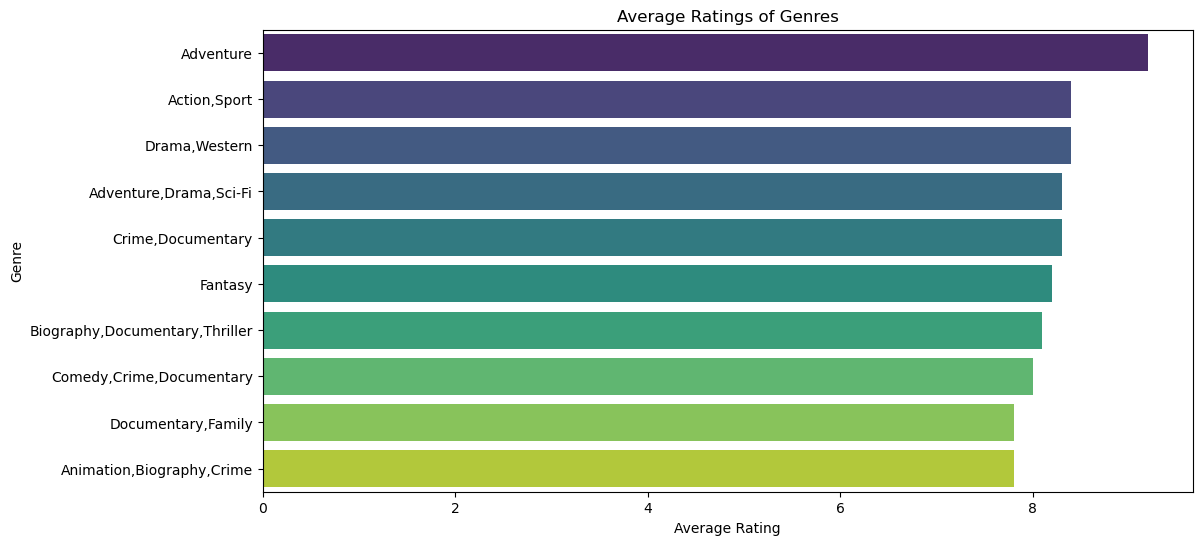

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='averagerating', y='genres', data=sorted_genre_avg_ratings.head(10), palette='viridis')  # using Seaborn for styling
plt.xlabel('Average Rating') # lable of x axis
plt.ylabel('Genre') # label of y axis
plt.title('Average Ratings of Genres') # title
plt.show()

### Average profit of top genres

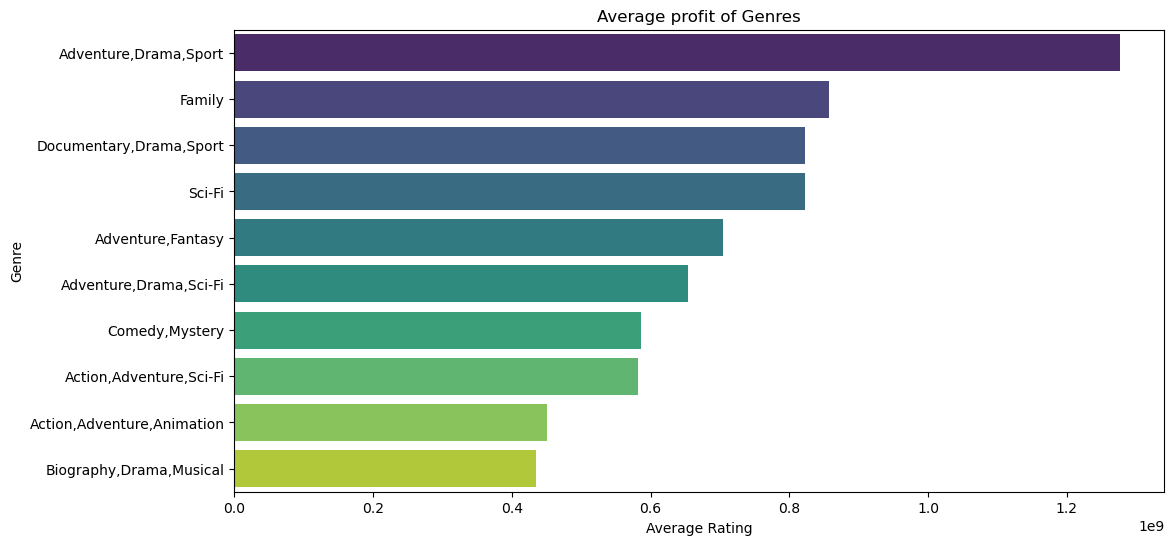

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='profit', y='genres', data=sort_genre_avg_profit.head(10), palette='viridis')  # using Seaborn for styling
plt.xlabel('Average Rating') # x axis label
plt.ylabel('Genre') # y axis label
plt.title('Average profit of Genres') # title
plt.show()

### **Top voted genres and their number of votes**

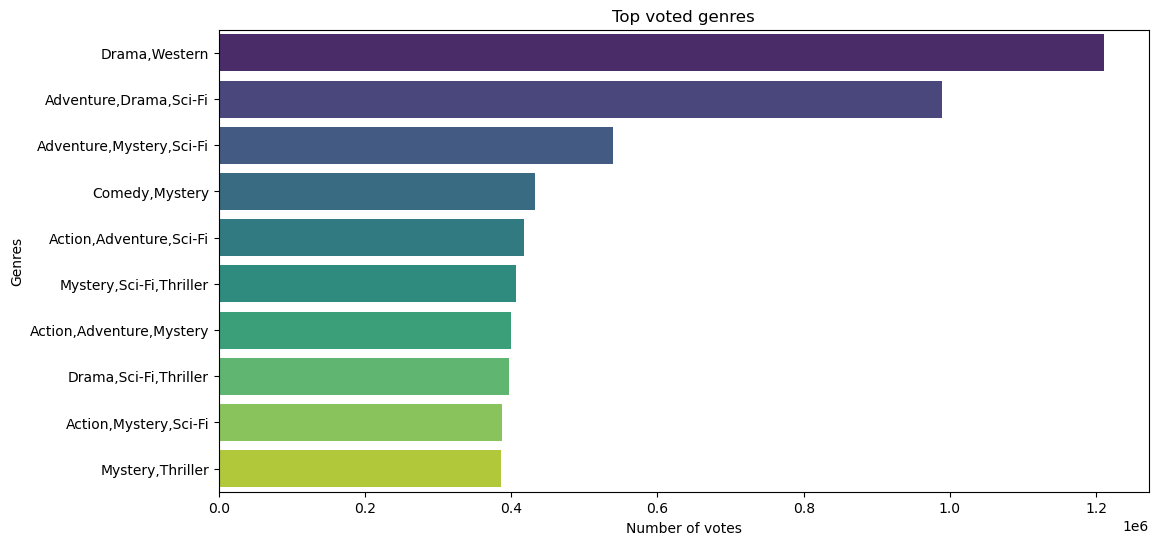

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='numvotes', y='genres', data=sorted_top_numvote_genres.head(10), palette='viridis') # sylying with seaborn
plt.title("Top voted genres") # title
plt.xlabel("Number of votes") # x axis label
plt.ylabel("Genres") # y axis label 
plt.show()

## Correlation 

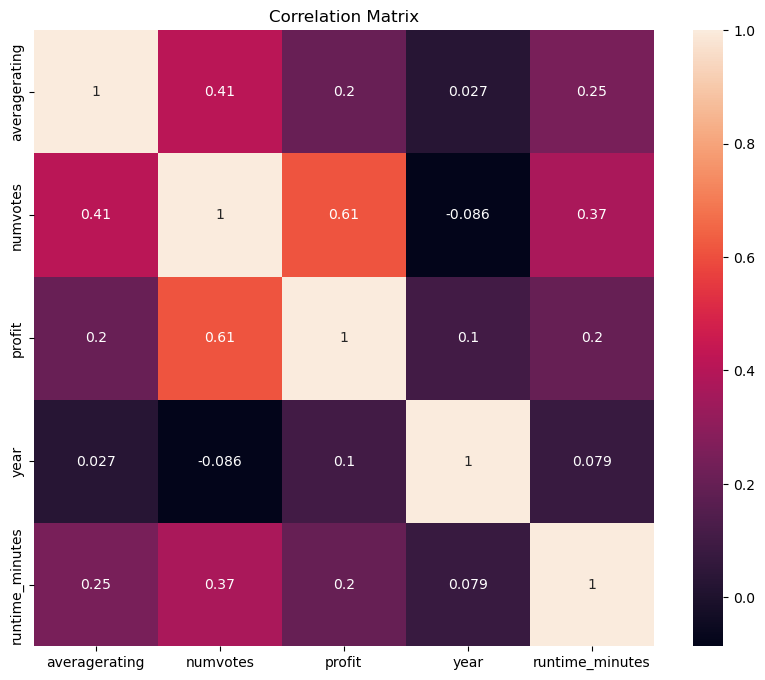

In [ ]:
final_data = final_data.copy()  # a copy of dataframe
final_data['profit'] = final_data['foreign_gross'] + final_data['domestic_gross'] # setting up profit column

data_values = final_data[['averagerating', 'numvotes', 'profit', 'year', 'runtime_minutes']]

#Calculate the correlation matrix using the corr() method
corr_matrix = data_values.corr()

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Recommendation and Conclusions

## Conclusions

- Building upon our analysis, it's evident that there exists a positive correlation between profit and the number of votes (0.61). Additionally, we observe another noteworthy correlation between runtime and profit (0.2). These statistical relationships shed light on the factors influencing a movie's financial success. As we delve deeper into our findings, we uncover more insights into the film industry's dynamics

- The most rated and profitable genres are Adventure, Drama, Sport, and Family.

- The most profitable genres in our analysis include Adventure, Drama, Sport, Family, Documentary, Sci-Fi, Fantasy, Comedy, Mystery, and Action. These genres have demonstrated strong financial performance in the film industry.
  
- The most rated genres in box office are Adventure,Action Sport, Drama Western, Adventure Drama Sci-Fi, Crime Documentary Fantasy, Biography Documentary Thriller, Comedy Crime Documentary, Documentary Family, Animation Biography Crime, 

- In the category of "Top Voted Genres," several genres have garnered significant attention and acclaim. These genres include Drama, Western, Adventure Drama Sci-Fi, Adventure Mystery Sci-Fi, Comedy Mystery, Action, Adventure, Sci-Fi, Mystery Sci-Fi Thriller, Action Adventure Mystery, Drama Sci-Fi Thriller, Action Mystery Sci-Fi, and Mystery Thriller. These genres have received notable recognition and appreciation, reflecting their popularity among viewers and critics alike. Their diverse themes and storytelling styles have contributed to their appeal and made them stand out as top choices in the world of cinema.

## Recommendations

- When selecting a movie to produce, genre, average rating, number of votes, and profitability should be the primary factors to consider.

- Focus on high-demand genres with strong profitability: Genres like Action, Adventure, Sci-Fi, Adventure, Animation, Comedy, and Action, Adventure, Fantasy have demonstrated significant profits. Investing in these genres can offer potential returns on investment due to their popularity and financial success.

- Consider genres with high ratings and reasonable budget requirements: Genres like Drama, Documentary, Adventure, Drama, Sci-Fi receive high ratings and have manageable budgets. These genres strike a balance between critical acclaim and financial viability, making them promising investment options.

- Explore opportunities in popular genres with high profitability potential: Genres like Drama, Comedy, and Adventure, Animation, Comedy are popular and typically come with moderate production costs. Investing in these genres can tap into widespread audience appeal while effectively managing production expenses, potentially leading to profitability.

